In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Examine Iris Data

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
import random

data = load_iris()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df['Species'] = data.target
data_df.loc[random.sample(data_df.index,5)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
55,5.7,2.8,4.5,1.3,1
108,6.7,2.5,5.8,1.8,2
80,5.5,2.4,3.8,1.1,1
74,6.4,2.9,4.3,1.3,1
97,6.2,2.9,4.3,1.3,1


In [28]:
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Classification Tree Visualization

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot

# Build the tree
data = load_iris()
clf = DecisionTreeClassifier(max_depth=3)
X = data.data
y = data.target
clf.fit(X,y)

# Visualize
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                     feature_names=data.feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris_tree.pdf')

True

### Regression Example

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot

# Build the tree
data = load_boston()
clf = DecisionTreeRegressor(max_depth=3)
X = data.data
y = data.target
clf.fit(X,y)

# Visualize
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                     feature_names=data.feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('boston_tree.pdf')

True

### Accuracy

#### Regression Tree

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Parameter Search                                                    
model = DecisionTreeRegressor()
depth_parm = np.linspace(1,12,12)
num_samples_parm = np.linspace(5,100,20)
parameters = {'max_depth' : depth_parm,
             'min_samples_leaf' : num_samples_parm}
regressor = GridSearchCV(model, parameters, scoring = 'mean_squared_error', cv=10)
regressor.fit(X_train,y_train)

                                                    
# Test Prediction
pred = regressor.predict(X_test)
rmse = np.sqrt(np.mean((y_test - pred)**2))
rmse



4.7253159917435754

#### Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Train and fit model                                                   
regressor = RandomForestRegressor(n_estimators=1000,
                                 max_features='auto',
                                 random_state=0)
regressor.fit(X_train,y_train)

                                                    
# Test Prediction
pred = regressor.predict(X_test)
rmse = np.sqrt(np.mean((y_test - pred)**2))
rmse

3.7281090856881427

#### Gradient Boosting

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=.33,
                                                    random_state=0)
# Parameter Search                                                    
gbr = GradientBoostingRegressor(n_estimators = 1000,
                                learning_rate=.1,
                                max_depth=4,
                                subsample=1,
                                max_features='auto',
                                random_state=0)
gbr.fit(X_train,y_train)

                                                    
# Test Prediction
pred = gbr.predict(X_test)
rmse = np.sqrt(np.mean((y_test - pred)**2))
rmse

3.458634505688496

### Random Forest Interpretation

#### Mean Decrease Impurity

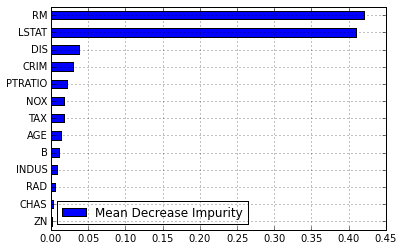

In [9]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import load_boston
from collections import defaultdict
import numpy as np
import pandas as pd

data = load_boston()
rf = RandomForestRegressor(n_estimators=1000, random_state=0)

# Split into test_train
train, test, target, actual = train_test_split(
    data.data, data.target, test_size=.33, random_state=0)

# Fit the model
rf.fit(train, target)
prediction = rf.predict(test)

# Plot the feature importance
feat_scores = pd.DataFrame({'Mean Decrease Impurity' : rf.feature_importances_},
                           index=data.feature_names)
feat_scores = feat_scores.sort('Mean Decrease Impurity')
feat_scores.plot(kind='barh')

#### Mean Decrease Accuracy

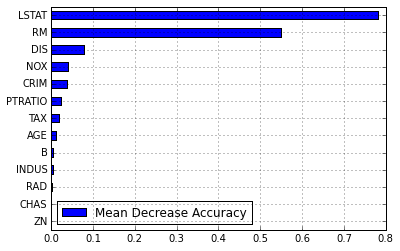

In [10]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
 
boston = load_boston()   
names = boston.feature_names
X = boston["data"]
Y = boston["target"]
 
rf = RandomForestRegressor()
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort('Mean Decrease Accuracy').plot(kind='barh')